## Get static program features of bowtie and cd-hit-dup

In [1]:
header='ft1 ft2 ft3 ft4 ft5 ft6 ft7 ft8 ft9 ft10 ft11 ft12 ft13 ft14 ft15 ft16 ft17 ft18 ft24 ft25 ft19 ft39 ft20 ft33 ft21 ft35 ft22 ft23 ft34 ft36 ft37 ft38 ft40 ft41 ft42 ft43 ft44 ft45 ft46 ft48 ft47 ft49 ft51 ft50 ft52 ft53 ft54 ft55 ft26 ft27 ft28 ft29 ft30 ft31 ft32'

In [2]:
import pandas as pd

def value(item):
    return item[item.find('=')+1:]

df = pd.read_table('cd-hit-dup_features.txt', header=None, delimiter=',',
                   converters={i:value for i in range(55)},
                   names=header.split())

bowtie_ft = pd.read_table('bowtie_features.txt', header=None, delimiter=',',
                   converters={i:value for i in range(55)},
                   names=header.split())

bowtie_ft = bowtie_ft.astype(float)
bowtie_ft

,ft1,ft2,ft3,ft4,ft5,ft6,ft7,ft8,ft9,ft10,...,ft53,ft54,ft55,ft26,ft27,ft28,ft29,ft30,ft31,ft32
0,4267.0,1648.0,2153.0,15.0,2843.0,847.0,357.0,1291.0,1403.0,245.0,...,219.0,3626.0,18.0,79.11,210.87,595.0,529.0,2923.0,9.0,1115.0


In [3]:
df = df.astype(float)

In [4]:
df

,ft1,ft2,ft3,ft4,ft5,ft6,ft7,ft8,ft9,ft10,...,ft53,ft54,ft55,ft26,ft27,ft28,ft29,ft30,ft31,ft32
0,341.0,106.0,94.0,0.0,168.0,68.0,11.0,94.0,46.0,9.0,...,1.0,160.0,0.0,19.89,51.20,55.0,20.0,172.0,5.0,70.0
1,415.0,154.0,164.0,1.0,242.0,75.0,34.0,126.0,107.0,26.0,...,5.0,214.0,0.0,11.95,42.52,84.0,11.0,256.0,14.0,81.0
2,352.0,142.0,172.0,0.0,213.0,103.0,18.0,97.0,108.0,40.0,...,3.0,267.0,1.0,9.27,19.65,61.0,51.0,222.0,2.0,110.0
3,1950.0,797.0,945.0,0.0,1218.0,518.0,86.0,588.0,580.0,179.0,...,65.0,1497.0,2.0,42.99,83.77,502.0,143.0,1177.0,7.0,638.0


In [5]:
rowsum = df.sum(axis=0)

In [6]:
data = [d for d in rowsum.values]
cols = [c for c in rowsum.index]

In [7]:
dup_ft = pd.DataFrame(columns=cols) #create empty dataframe

In [8]:
dup_ft.loc[0] = data #add one row

In [9]:
dup_ft

,ft1,ft2,ft3,ft4,ft5,ft6,ft7,ft8,ft9,ft10,...,ft53,ft54,ft55,ft26,ft27,ft28,ft29,ft30,ft31,ft32
0,3058.0,1199.0,1375.0,1.0,1841.0,764.0,149.0,905.0,841.0,254.0,...,74.0,2138.0,3.0,84.1,197.14,702.0,225.0,1827.0,28.0,899.0


## Bowtie: DF1 = Append to CPU, DataSize
## DUP:      DF2 = Append to CPU, DataSize
## Add totaltime column to both DF1, DF2
## DF1 U DF2
## Model Training to predict totaltime (57 features)

In [10]:
# read DUP ppn, size, Ytime from csv
dup_ppn_size_time = pd.read_csv('22July_dup_ppn_sizeGB_Ytime.csv')
del dup_ppn_size_time['Unnamed: 0']
dup_ppn_size_time.head(2)

,ppn,sizeGB,Y_time
0,11,1.2,45.82
1,11,1.7,67.97


In [11]:
rows = dup_ppn_size_time.shape[0]
rows

32

In [12]:
# create dataframe from DUP static program features with same #ROWs
frames = [dup_ft for i in range(rows)]
DUP_program_ft = pd.concat(frames)
DUP_program_ft.reset_index(inplace=True)
del DUP_program_ft['index']
DUP_program_ft.shape

(32, 55)

In [13]:
# read BOWTIE ppn, size, YTime from csv
bowtie_ppn_size_time = pd.read_csv('22July_BOWTIE_ppn_sizeGB_Ytime.csv')
del bowtie_ppn_size_time['Unnamed: 0']
bowtie_ppn_size_time.head(2)

,ppn,sizeGB,Y_time
0,11,0.56,841.52
1,11,0.56,828.67


In [14]:
rows = bowtie_ppn_size_time.shape[0]
rows

64

In [15]:
# create dataframe from BOWTIE static program features with same #ROWS
frames = [bowtie_ft for i in range(rows)]
BOWTIE_program_ft = pd.concat(frames)
BOWTIE_program_ft.reset_index(inplace=True)
del BOWTIE_program_ft['index']
BOWTIE_program_ft.shape

(64, 55)

In [16]:
DUP_ft_concat = pd.concat([dup_ppn_size_time, DUP_program_ft], axis=1, join_axes=[dup_ppn_size_time.index])
DUP_ft_concat['y_time']=DUP_ft_concat['Y_time']
del DUP_ft_concat['Y_time']
DUP_ft_concat.shape

(32, 58)

In [17]:
BOWTIE_ft_concat = pd.concat([bowtie_ppn_size_time, BOWTIE_program_ft], axis=1, 
                            join_axes=[bowtie_ppn_size_time.index])

BOWTIE_ft_concat['y_time']=BOWTIE_ft_concat['Y_time']
del BOWTIE_ft_concat['Y_time']
BOWTIE_ft_concat.shape

(64, 58)

In [18]:
# union DUP_ft_concat, BOWTIE_ft_concat
frames = [DUP_ft_concat, BOWTIE_ft_concat]
dup_bowtie = pd.concat(frames)
dup_bowtie.reset_index(inplace=True)
del dup_bowtie['index']
dup_bowtie.head(2)

,ppn,sizeGB,ft1,ft2,ft3,ft4,ft5,ft6,ft7,ft8,...,ft54,ft55,ft26,ft27,ft28,ft29,ft30,ft31,ft32,y_time
0,11,1.2,3058.0,1199.0,1375.0,1.0,1841.0,764.0,149.0,905.0,...,2138.0,3.0,84.1,197.14,702.0,225.0,1827.0,28.0,899.0,45.82
1,11,1.7,3058.0,1199.0,1375.0,1.0,1841.0,764.0,149.0,905.0,...,2138.0,3.0,84.1,197.14,702.0,225.0,1827.0,28.0,899.0,67.97


In [19]:
dup_bowtie.columns[0:57]

Index(['ppn', 'sizeGB', 'ft1', 'ft2', 'ft3', 'ft4', 'ft5', 'ft6', 'ft7', 'ft8',
       'ft9', 'ft10', 'ft11', 'ft12', 'ft13', 'ft14', 'ft15', 'ft16', 'ft17',
       'ft18', 'ft24', 'ft25', 'ft19', 'ft39', 'ft20', 'ft33', 'ft21', 'ft35',
       'ft22', 'ft23', 'ft34', 'ft36', 'ft37', 'ft38', 'ft40', 'ft41', 'ft42',
       'ft43', 'ft44', 'ft45', 'ft46', 'ft48', 'ft47', 'ft49', 'ft51', 'ft50',
       'ft52', 'ft53', 'ft54', 'ft55', 'ft26', 'ft27', 'ft28', 'ft29', 'ft30',
       'ft31', 'ft32'],
      dtype='object')

In [20]:
ft0 = dup_bowtie.copy(deep=True)

In [21]:
import numpy as np
ft1=ft0.iloc[np.random.permutation(len(ft0))]
ft=ft1.reset_index(drop=True)
ft.shape

(96, 58)

### ft_all

In [22]:
ft_all = ft.copy(deep=True) #store a copy - do not change this later

In [23]:
features = ft.columns[0:57]
target = ft.columns[57]
features

Index(['ppn', 'sizeGB', 'ft1', 'ft2', 'ft3', 'ft4', 'ft5', 'ft6', 'ft7', 'ft8',
       'ft9', 'ft10', 'ft11', 'ft12', 'ft13', 'ft14', 'ft15', 'ft16', 'ft17',
       'ft18', 'ft24', 'ft25', 'ft19', 'ft39', 'ft20', 'ft33', 'ft21', 'ft35',
       'ft22', 'ft23', 'ft34', 'ft36', 'ft37', 'ft38', 'ft40', 'ft41', 'ft42',
       'ft43', 'ft44', 'ft45', 'ft46', 'ft48', 'ft47', 'ft49', 'ft51', 'ft50',
       'ft52', 'ft53', 'ft54', 'ft55', 'ft26', 'ft27', 'ft28', 'ft29', 'ft30',
       'ft31', 'ft32'],
      dtype='object')

In [24]:
target

'y_time'

In [26]:
from sklearn.ensemble.forest import RandomForestRegressor
import numpy as  np
from sklearn import cross_validation
model = RandomForestRegressor(n_estimators=1500, n_jobs=-1)

rmse = np.array([  297.59290466,  1367.76369731,   164.79490009,    33.22493526, 389.47117031])

while (rmse.mean() > 100):
    scoresMSE = cross_validation.cross_val_score(model, ft_all[features], ft_all[target], cv=5,scoring='mean_squared_error')
    rmse = np.sqrt(-scoresMSE)

KeyboardInterrupt: 

In [27]:
scoresMSE = cross_validation.cross_val_score(model, ft_all[features], ft_all[target], cv=5,scoring='mean_squared_error')
rmse = np.sqrt(-scoresMSE)
rmse

array([ 261.85087705,  252.14559942,  297.89398751,  289.29361372,
        198.29462949])

In [28]:
rmse.mean()

259.89574143724747

In [29]:
from sklearn.ensemble.forest import RandomForestRegressor
import numpy as  np
from sklearn import cross_validation
model = RandomForestRegressor(n_estimators=1500, n_jobs=-1)

rmse = np.array([  297.59290466,  1367.76369731,   164.79490009,    33.22493526, 389.47117031])

while (rmse.mean() > 150):
    scoresMSE = cross_validation.cross_val_score(model, ft_all[features], ft_all[target], cv=5,scoring='mean_squared_error')
    rmse = np.sqrt(-scoresMSE)

Exception in thread Thread-16088:
Traceback (most recent call last):
  File "/home/comet/anaconda3/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/home/comet/anaconda3/lib/python3.5/threading.py", line 862, in run
    self._target(*self._args, **self._kwargs)
  File "/home/comet/anaconda3/lib/python3.5/multiprocessing/pool.py", line 445, in _handle_results
    cache[job]._set(i, obj)
  File "/home/comet/anaconda3/lib/python3.5/multiprocessing/pool.py", line 613, in _set
    self._callback(self._value)
  File "/home/comet/anaconda3/lib/python3.5/site-packages/sklearn/externals/joblib/parallel.py", line 224, in __call__
    self.parallel.dispatch_next()
  File "/home/comet/anaconda3/lib/python3.5/site-packages/sklearn/externals/joblib/parallel.py", line 592, in dispatch_next
    if not self.dispatch_one_batch(self._original_iterator):
  File "/home/comet/anaconda3/lib/python3.5/site-packages/sklearn/externals/joblib/parallel.py", line 658, in dispatch_o

KeyboardInterrupt: 

In [25]:
from sklearn.ensemble.forest import RandomForestRegressor
import numpy as  np

model = RandomForestRegressor(n_estimators=1500, n_jobs=-1)

np.random.seed()
ft['is_train']=np.random.uniform(0,1,len(ft)) <= .6
train, test = ft[ft['is_train']==True], ft[ft['is_train']==False]
del ft['is_train']
len(train)*1.0 / (len(test)+len(train))

0.6041666666666666

In [26]:
X_train = train[features]
Y_train = train[target]

X_test = test[features]
Y_test = test[target].as_matrix()

In [27]:
model.fit(X_train, Y_train.values)
Y_prediction = model.predict(X_test)

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(Y_test, Y_prediction))
print(rmse)

199.319727896


In [28]:
Y_test #Print Y values of test dataset

array([  120.19,  1714.64,    97.49,  2495.68,   828.67,  2984.39,
          68.75,   427.76,   416.51,    67.97,  2114.32,    98.47,
        3331.77,    45.82,   164.88,  1674.9 ,  3356.98,  1773.46,
          97.83,   854.45,  1728.48,  1253.48,    45.94,  2970.43,
        3391.35,  2156.88,    21.63,   120.44,  2459.98,  2136.25,
        1273.04,   426.53,  2076.99,  1291.39,    98.42,   141.54,
        1665.97,  1268.4 ])

In [29]:
Y_prediction #Print Y predicted values of test dataset

array([  129.82480667,  1720.66728165,    77.64424   ,  3033.90303573,
        1051.63637233,  3306.12408629,    67.83260667,   457.80378371,
         437.80021825,    63.65603333,  2129.17119489,    74.2949    ,
        3357.66416197,    49.76958   ,   169.74806667,  1690.85339759,
        3275.97136267,  1436.16695925,    75.35480667,   881.17931122,
        1723.86517387,  1219.56800333,    50.92700667,  3306.12408629,
        4287.91324774,  2141.27861444,    26.67301333,   125.41512667,
        2490.74026046,  2245.52651825,  1245.15920444,   436.51621978,
        2095.54411222,  1253.06823508,    75.19571333,   140.33786667,
        1690.85339759,  1350.90424111])

In [30]:
ft[target].mean(), ft[target].std() * 2

(1389.7422916666665, 2681.7670396685203)

### take out 10% for validation. minimize over train-test, finally validate over the 10%

In [31]:
from sklearn.cross_validation import train_test_split

#copy from ft_all
ft0 =ft_all.copy(deep=True)

#shuffle
ft1 =ft0.iloc[np.random.permutation(len(ft0))]
ft2  =ft1.reset_index(drop=True)
ft2.head(2)

,ppn,sizeGB,ft1,ft2,ft3,ft4,ft5,ft6,ft7,ft8,...,ft54,ft55,ft26,ft27,ft28,ft29,ft30,ft31,ft32,y_time
0,5,0.27,4267.0,1648.0,2153.0,15.0,2843.0,847.0,357.0,1291.0,...,3626.0,18.0,79.11,210.87,595.0,529.0,2923.0,9.0,1115.0,435.69
1,2,2.30,4267.0,1648.0,2153.0,15.0,2843.0,847.0,357.0,1291.0,...,3626.0,18.0,79.11,210.87,595.0,529.0,2923.0,9.0,1115.0,3362.83


In [32]:
#split ft2
ft_subset, validationSet = train_test_split(ft2, test_size = 0.1)
ft = ft_subset.copy(deep=True)

ft.shape, validationSet.shape, ft_all.shape
#both test and train are taken from ft

((86, 58), (10, 58), (96, 58))

In [33]:
rmse_testSet = 10000
while(rmse_testSet > 50):
    np.random.seed()
    ft['is_train']=np.random.uniform(0,1,len(ft)) <= .8
    train, test = ft[ft['is_train']==True], ft[ft['is_train']==False]
    del ft['is_train']
    
    features = ft.columns[0:57]
    target   = ft.columns[57]
    
    
    X_train = train[features]
    Y_train = train[target]
    X_test = test[features]
    Y_test = test[target].as_matrix()
    
    model = RandomForestRegressor(n_estimators=1500, n_jobs=-1)
    model.fit(X_train, Y_train.values)
    Y_prediction = model.predict(X_test)
    
    rmse_testSet = np.sqrt(mean_squared_error(Y_test, Y_prediction))

In [34]:
len(train)*1.0 / (len(test)+len(train))

0.8372093023255814

In [35]:
rmse_testSet

30.357482053654298

In [36]:
Y_test #Print Y values of test dataset

array([   98.47,  1674.9 ,  2150.65,  1665.97,    45.97,    45.82,
         418.52,  2076.99,   120.19,   428.11,   203.98,  1268.4 ,
        1697.59,  1714.64])

In [37]:
Y_prediction #Print Y predicted values of test dataset

array([   96.54021333,  1683.80297654,  2144.25716753,  1683.80297654,
          53.29223333,    53.05968   ,   423.36667946,  2088.26840335,
         122.94888667,   429.75608352,   197.18118   ,  1374.41013898,
        1727.22437921,  1720.17099052])

In [86]:
# save the regression model (get E2, E3 ... from notebook name)

#import pickle as cPickle
#with open('dup_bowtie_rf_E3.pkl', 'wb') as fid:
#    cPickle.dump(model, fid)

In [87]:
#load a stored model:

import pickle as cPickle
with open('dup_bowtie_rf_E3.pkl', 'rb') as fid:
    model = cPickle.load(fid)

In [39]:
#check accuracy on validation set
X_validation = validationSet[features]
Y_validation = validationSet[target].as_matrix()
Y_prediction = model.predict(X_validation)
rmse_validationSet = np.sqrt(mean_squared_error(Y_validation, Y_prediction))
rmse_validationSet

42.588730441604675

In [93]:
Y_validation

array([ 2942.53,  3270.41,    46.36,   203.5 ,  1711.82,   142.31,
        3356.98,  2921.19,  2513.88,   166.8 ])

In [94]:
Y_prediction

array([ 3013.4879877 ,  3331.84420269,    53.35614   ,   197.20974667,
        1720.17099052,   139.64814   ,  3331.84420269,  3013.4879877 ,
        2515.77081948,   169.82696   ])

In [95]:
validationSet[target].mean(), validationSet[target].std() * 2

(1727.578, 2879.276829511188)

### Feature Importance

<function matplotlib.pyplot.show>

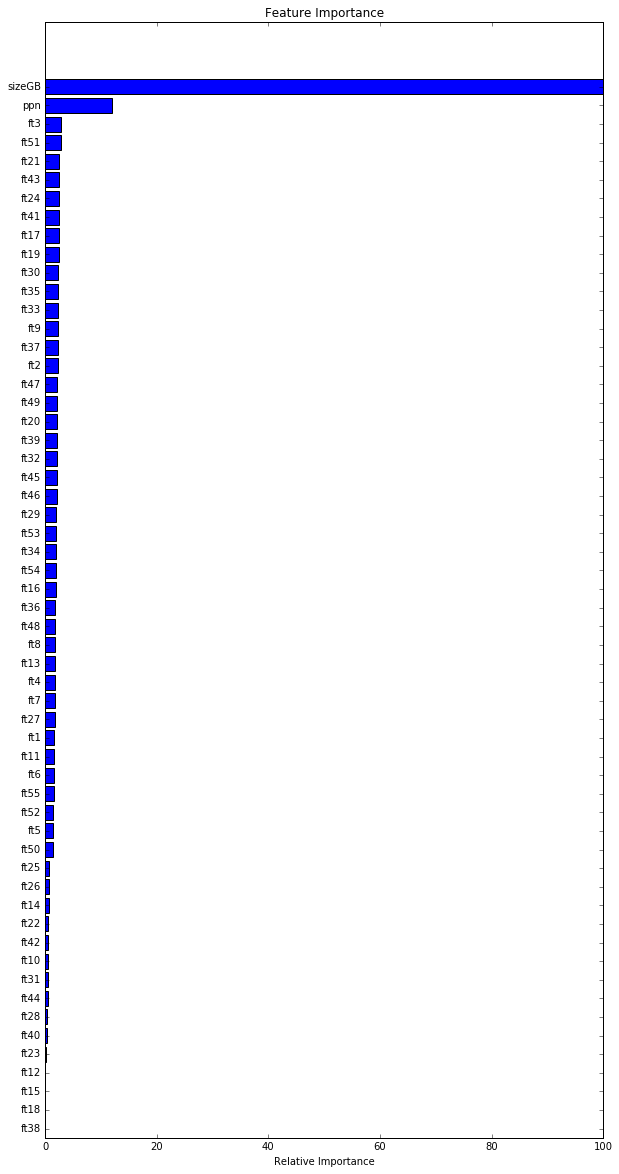

In [89]:
# Plot the feature importances of the forest
%matplotlib inline
import matplotlib.pyplot as plt

feature_importance = model.feature_importances_

feature_importance = 100.0 * (feature_importance / feature_importance.max())

sorted_idx = np.argsort(feature_importance)

pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(num=None, figsize=(10, 20), dpi=80, facecolor='w', edgecolor='k')

plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Feature Importance')
plt.show

### Feature Importance: print values

In [90]:
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_],axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d %s..................(%f)" % 
          (f + 1, indices[f],X_train.columns.values[indices[f]], importances[indices[f]]))

Feature ranking:
1. feature 1 sizeGB..................(0.502777)
2. feature 0 ppn..................(0.060578)
3. feature 4 ft3..................(0.014009)
4. feature 44 ft51..................(0.013910)
5. feature 26 ft21..................(0.012568)
6. feature 37 ft43..................(0.012498)
7. feature 20 ft24..................(0.012275)
8. feature 35 ft41..................(0.012181)
9. feature 18 ft17..................(0.012091)
10. feature 22 ft19..................(0.011997)
11. feature 54 ft30..................(0.011917)
12. feature 27 ft35..................(0.011768)
13. feature 25 ft33..................(0.011624)
14. feature 10 ft9..................(0.011600)
15. feature 32 ft37..................(0.011274)
16. feature 3 ft2..................(0.011153)
17. feature 42 ft47..................(0.010937)
18. feature 43 ft49..................(0.010922)
19. feature 24 ft20..................(0.010889)
20. feature 23 ft39..................(0.010888)
21. feature 56 ft32..................(

#### Plot the feature importances of the forest


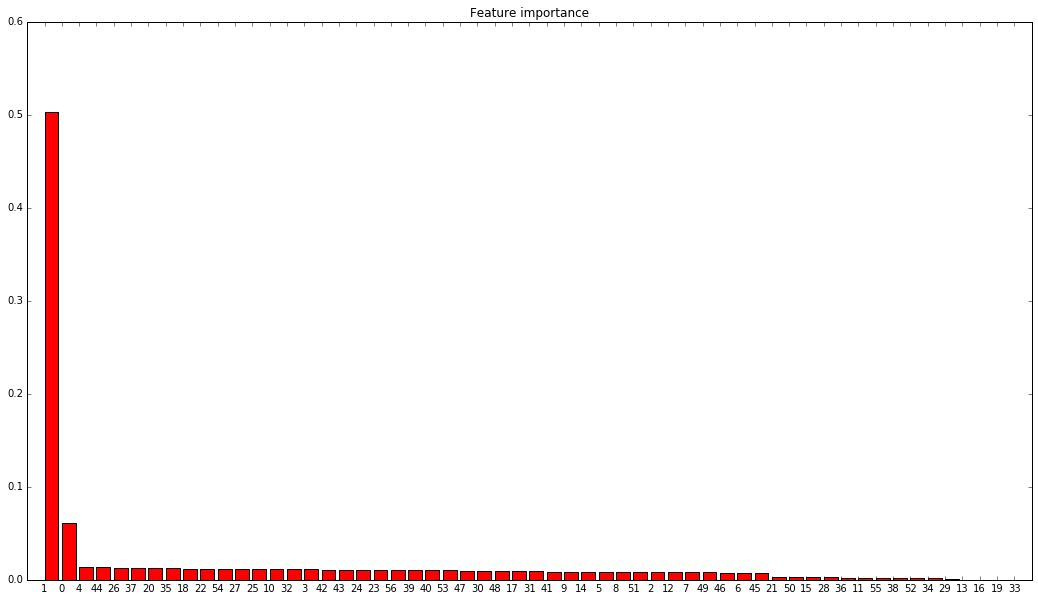

In [91]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(18, 10))
plt.title("Feature importance")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [56]:
from sklearn import cross_validation
scoresCV = cross_validation.cross_val_score(model, data[features], data[target], cv=10,scoring='mean_squared_error')

In [57]:
scoresCV #-ve of MSE

array([-152278.19237241, -155331.18177758, -149387.6110684 ,
          -664.62938955,  -13100.74194683, -110899.93828897,
        -86283.33376448,  -69830.81881541,   -4789.38373033,
         -1885.74330075])

In [58]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scoresCV.mean(), scoresCV.std() * 2))

Accuracy: -74445.16 (+/- 124949.25)


In [59]:
ft[target].mean(), ft[target].std() * 2

(1350.459069767442, 2664.6262027765847)